In [1]:
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Initial CSV Reads

xGS_Final = pd.read_csv(r'CSVs\International\xGS_Final.csv' ,encoding='latin-1')
xGA_Final = pd.read_csv(r'CSVs\International\xGA_Final.csv' ,encoding='latin-1')
World_Cup_Teams = pd.read_csv(r'CSVs\World_Cup_Teams.csv' ,encoding='latin-1')
xGS_Predictors = pd.read_csv(r'CSVs\xGS_Predictors.csv', encoding='latin-1')
xGA_Predictors = pd.read_csv(r'CSVs\xGA_Predictors.csv', encoding='latin-1')

# loading linear algorithms
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor


# machine learning processing and metrics
from sklearn.model_selection import train_test_split

#Display Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Get features and target for both models

xGS_X = xGS_Final.drop(['Key','Squad','Gls'], axis=1).values
xGS_y = xGS_Final['Gls'].values

xGA_X = xGA_Final.drop(['Key','Squad','O. Gls'], axis=1).values
xGA_y = xGA_Final['O. Gls'].values

# Use the Sklearn `train_test_split()` function to split the data into training and testing data
xGS_X_train, xGS_X_test, xGS_y_train, xGS_y_test = train_test_split(xGS_X, xGS_y, random_state=25, test_size=.2)


xGA_X_train, xGA_X_test, xGA_y_train, xGA_y_test = train_test_split(xGA_X, xGA_y, random_state=25, test_size=.2)

In [3]:
# Initiate ML Models - GradientBoostingRegressor for the xGS Model, Ridge model for xGA

xGS_ML = Ridge(random_state=22) #GradientBoostingRegressor(random_state=25, n_estimators=600, learning_rate=.05)
xGA_ML = Ridge(random_state=22)

# Fit Model & Get Predictions. Add predictions to each total Dataframe

xGS_ML_Fit = xGS_ML.fit(xGS_X, xGS_y)
xGA_ML_Fit = xGA_ML.fit(xGA_X, xGA_y)

xGS_preds = xGS_ML_Fit.predict(xGS_X)
xGA_preds = xGA_ML_Fit.predict(xGA_X)

xGS_Final['xGS'] = xGS_preds
xGA_Final['xGA'] = xGA_preds

# Add xGS and xGA to World Cup Teams DF
World_Cup_Teams = pd.merge(World_Cup_Teams,xGS_Final[['Key','xGS']], on='Key', how='inner')
World_Cup_Teams = pd.merge(World_Cup_Teams,xGA_Final[['Key','xGA']], on='Key', how='inner')

In [4]:
xGS_Simulation_vals = xGS_Predictors.drop(['Squad','Gls'], axis=1).values
xGA_Simulation_vals = xGA_Predictors.drop(['Squad','O. Gls'], axis=1).values

xGS_Simulation_Preds = xGS_ML_Fit.predict(xGS_Simulation_vals)
xGA_Simulation_Preds = xGA_ML_Fit.predict(xGA_Simulation_vals)

In [ ]:
type(xGS_Predictors['Gls'])

In [ ]:
xGS_Final.sort_values(by=['Poss'], ascending = False)

In [ ]:
World_Cup_Teams['xGS'] = xGS_Simulation_Preds
World_Cup_Teams['xGA'] = xGA_Simulation_Preds

In [ ]:
World_Cup_Teams

In [ ]:
x_GS_preds = x_GS_ML_Fit.predict(test)

In [ ]:
xGS_Final[]

In [ ]:
xGA_Predictors

TRAINING SET
root mean squared error (RMSE): 0.38280611772884804
R-squared (R2 ): 0.6979497744058238
MAE 0.3035594328676824

Testing SET
root mean squared error (RMSE): 0.3785549096272514
R-squared (R2 ): 0.5997666638573123
MAE 0.3002709747062966


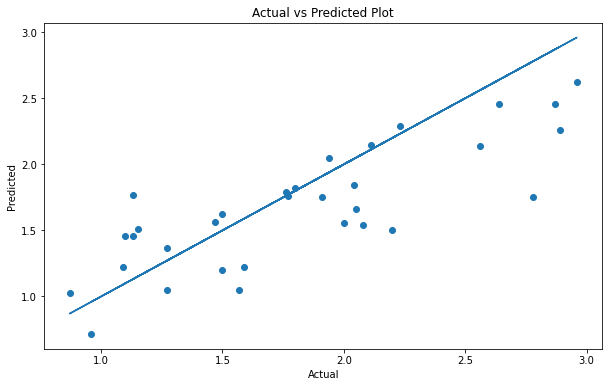

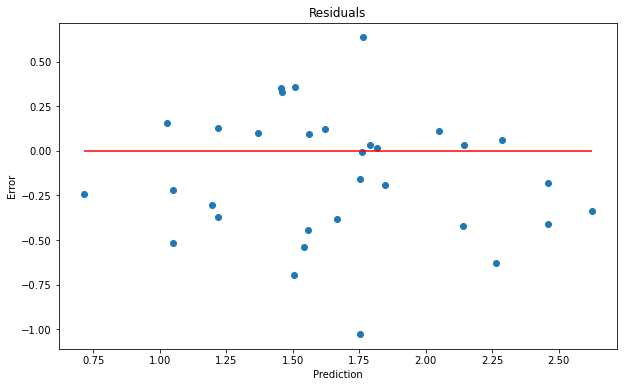

Ridge(random_state=22)

In [10]:
evaluateModel(xGS_ML, xGS_X_train, xGS_y_train, xGS_Simulation_vals, xGS_Predictors['Gls'] )

TRAINING SET
root mean squared error (RMSE): 0.4456476186718738
R-squared (R2 ): 0.7172414376990088
MAE 0.335226390544063

Testing SET
root mean squared error (RMSE): 0.22404415281167847
R-squared (R2 ): 0.45312819250004044
MAE 0.17552622182524708


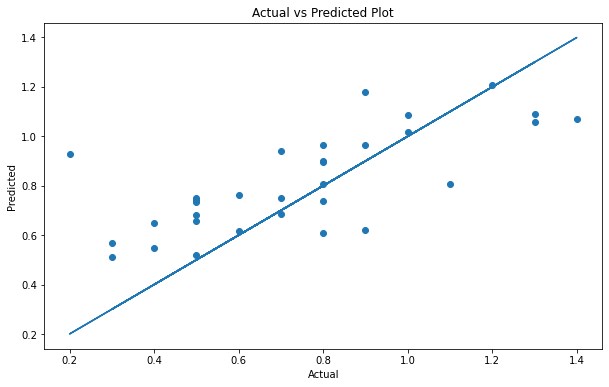

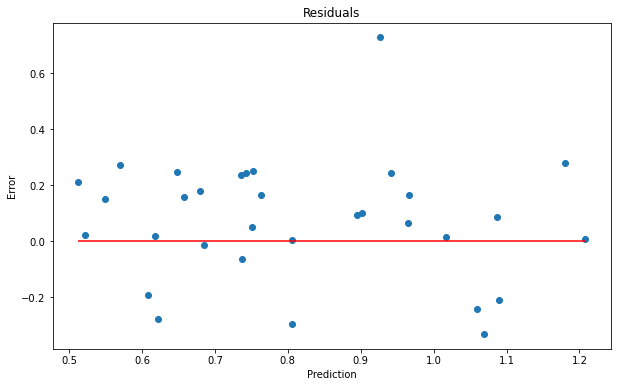

Ridge(random_state=22)

In [11]:
evaluateModel(xGA_ML, xGA_X_train, xGA_y_train, xGA_Simulation_vals, xGA_Predictors['O. Gls'] )

TRAINING SET
root mean squared error (RMSE): 0.4456476186718738
R-squared (R2 ): 0.7172414376990088
MAE 0.335226390544063

Testing SET
root mean squared error (RMSE): 0.4459715166472795
R-squared (R2 ): 0.7401602856916338
MAE 0.32941825394368923


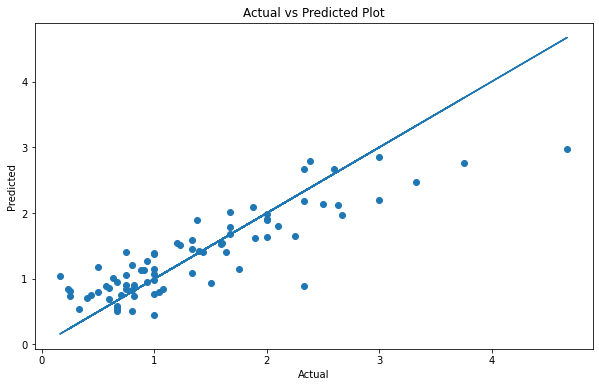

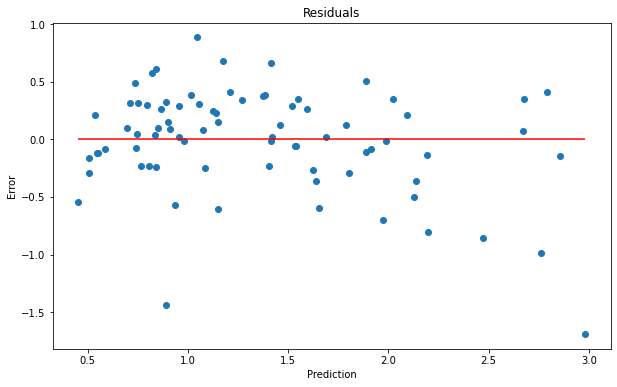

Ridge(random_state=22)

In [12]:
evaluateModel(xGA_ML, xGA_X_train, xGA_y_train, xGA_X_test, xGA_y_test )

TRAINING SET
root mean squared error (RMSE): 0.38280611772884804
R-squared (R2 ): 0.6979497744058238
MAE 0.3035594328676824

Testing SET
root mean squared error (RMSE): 0.39487114713657023
R-squared (R2 ): 0.5883159318601502
MAE 0.3046116628117772


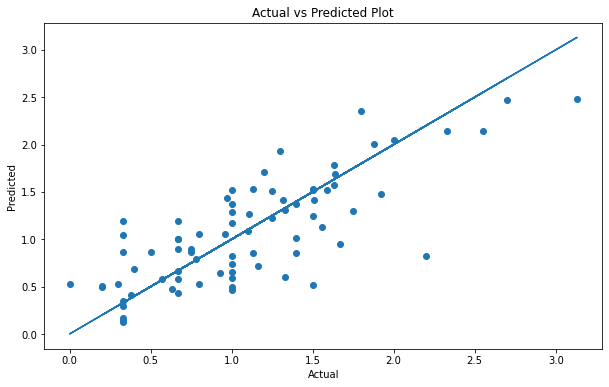

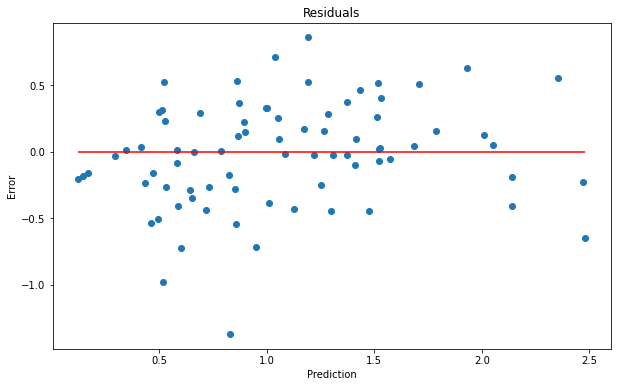

Ridge(random_state=22)

In [13]:
evaluateModel(xGS_ML, xGS_X_train, xGS_y_train, xGS_X_test, xGS_y_test )

In [ ]:
# Create new predicted Values for each team
Squad_Predicted_Values = World_Cup_Teams[['Squad','Group','xGS','xGA']].copy()

Squad_Predicted_Values['% of Points Taken'] = (np.power(Squad_Predicted_Values['xGS'],1.2))/((np.power(Squad_Predicted_Values['xGS'],1.2)) + (np.power(Squad_Predicted_Values['xGA'],1.2)))

In [ ]:
Squad_Predicted_Values.sort_values(by='% of Points Taken', ascending=False)

In [ ]:
# Export Predicted Values to CSV
Squad_Predicted_Values.to_csv('CSVs/Predictions/Predictions_Final.csv', index=False)

In [ ]:
final_dict = Squad_Predicted_Values.set_index('Squad').T.to_dict('dict')

In [ ]:
xGS_Final[]

In [ ]:
Squad_Predicted_Values.sort_values(by='xGS')

In [ ]:
xGS_Final.loc[xGS_Final['Confederation_CONMEBOL'] == 1]

In [ ]:
World_Cup_Teams

In [5]:
# Grabbed function that takes in a model algorithm and the training data and prints graphs and metrics

def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    # Score the prediction with MSE and R2
    mse_train = np.sqrt(mean_squared_error(y_train, train_preds))
    r2_train = r2_score(y_train, train_preds)
    mae_train = mean_absolute_error(y_train, train_preds)

    print(f"root mean squared error (RMSE): {mse_train}")
    print(f"R-squared (R2 ): {r2_train}")
    print(f"MAE {mae_train}")

    print()

    # PRINT the METRICS
    print("Testing SET")

    # Score the prediction with MSE and R2
    mse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    r2_test = r2_score(y_test, test_preds)
    mae_test = mean_absolute_error(y_test, test_preds)

    print(f"root mean squared error (RMSE): {mse_test}")
    print(f"R-squared (R2 ): {r2_test}")
    print(f"MAE {mae_test}")
    
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, test_preds)
    plt.title("Actual vs Predicted Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(y_test, y_test)
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10,6))
    plt.scatter(test_preds, test_preds - y_test)
    plt.hlines(y=0, xmin=test_preds.min(), xmax=test_preds.max(), color="r")
    plt.title("Residuals")
    plt.xlabel("Prediction")
    plt.ylabel("Error")
    plt.show()

    return(model)

In [ ]:
evaluateModel()